In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits import mplot3d
import matplotlib.font_manager as mfm

np.set_printoptions(precision=4, linewidth=150)

mpl.style.use('bmh')
mpl.style.use('seaborn-whitegrid')
style = plt.style.library['bmh']

style_colors = [ c['color'] for c in style['axes.prop_cycle'] ]


In [2]:
def arrowed_spines(fig, ax, axis='both', remove_ticks=False):
    """
    https://stackoverflow.com/questions/33737736/matplotlib-axis-arrow-tip
    """
    xmin, xmax = ax.get_xlim() 
    ymin, ymax = ax.get_ylim()

    # removing the default axis on all sides:
    for side in ['bottom','right','top','left']:
        ax.spines[side].set_visible(False)

    if remove_ticks == True: 
        # removing the axis ticks
        plt.xticks([]) # labels 
        plt.yticks([])
        ax.xaxis.set_ticks_position('none') # tick markers
        ax.yaxis.set_ticks_position('none')

    # get width and height of axes object to compute 
    # matching arrowhead length and width
    dps = fig.dpi_scale_trans.inverted()
    bbox = ax.get_window_extent().transformed(dps)
    width, height = bbox.width, bbox.height

    # manual arrowhead width and length
    hw = 1./50.*(ymax-ymin) 
    hl = 1./25.*(xmax-xmin)
    lw = 1. # axis line width
    ohg = 0.4 # arrow overhang

    # compute matching arrowhead length and width
    yhw = hw/(ymax-ymin)*(xmax-xmin)* height/width 
    yhl = hl/(xmax-xmin)*(ymax-ymin)* width/height

    # draw x and y axis
    if axis == 'x':
        ax.arrow(xmin, 0, xmax-xmin, 0., fc='k', ec='k', lw = lw, 
                 head_width=hw, head_length=hl, #overhang = ohg, 
                 length_includes_head= True, clip_on = False) 
    elif axis == 'y':
        ax.arrow(0, ymin, 0., ymax-ymin, fc='k', ec='k', lw = lw, 
                 head_width=yhw, head_length=yhl, #overhang = ohg, 
                 length_includes_head= True, clip_on = False)
    else :
        ax.arrow(xmin, 0, xmax-xmin, 0., fc='k', ec='k', lw = lw, 
                 head_width=hw, head_length=hl, #overhang = ohg, 
                 length_includes_head= True, clip_on = False) 

        ax.arrow(0, ymin, 0., ymax-ymin, fc='k', ec='k', lw = lw, 
                 head_width=yhw, head_length=yhl, #overhang = ohg, 
                 length_includes_head= True, clip_on = False)
   

In [4]:
x = 5

# 함수와 순간의 변화율을 계산해주는 알려진 함수를 정의한다.
f  = lambda x : x**2
df = lambda x : 2*x

print("df(x)={:.3f} at x={}".format(df(x), x))
print("df(x)={:.3f} at x={}".format((f(x+0.01)-f(x))/0.01, x))

df(x)=10.000 at x=5
df(x)=10.010 at x=5


In [5]:
x = 5

f   = lambda x : np.exp(x)
df  = lambda x : np.exp(x)

print("df(x)={:.4f} at x={}".format(df(x), x))
print("df(x)={:.4f} at x={}".format((f(x+0.0001)-f(x))/0.0001, x))

df(x)=148.4132 at x=5
df(x)=148.4206 at x=5


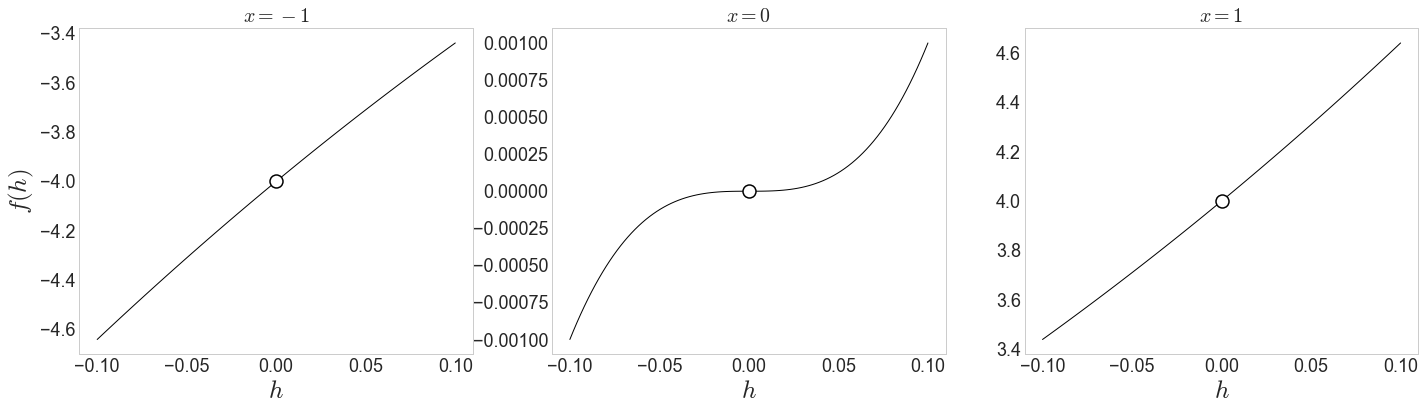

In [6]:
fig, ax = plt.subplots(1,3, sharex=True)
fig.set_size_inches(24,6)

f = lambda x : x**4

xs = [-1, 0, 1]
ls = ['-', '-', '-']
df = lambda h : (f(x+h) - f(x)) / h

h = np.linspace(-0.1, 0.1, 100)

for i, x in enumerate(xs) : 
    ax[i].plot(h, df(h), lw=1, color='k')
    ax[i].plot(0, df(0.00001), 'o',   markersize=13, markerfacecolor='w',
         markeredgewidth=1.5, markeredgecolor='k')
    ax[i].set_title(r'$x={}$'.format(x), fontsize=20)
    ax[i].set_xlabel(r'$h$', fontsize=25)
    
    if i == 0:
        ax[i].set_ylabel(r'$f(h)$', fontsize=25)
        
    ax[i].xaxis.set_tick_params(labelsize=18)
    ax[i].yaxis.set_tick_params(labelsize=18)   
    # ax[i].set_yticklabels( () )
    ax[i].grid(False)

#plt.subplots_adjust(hspace=0.05, wspace=0.05)

plt.show()

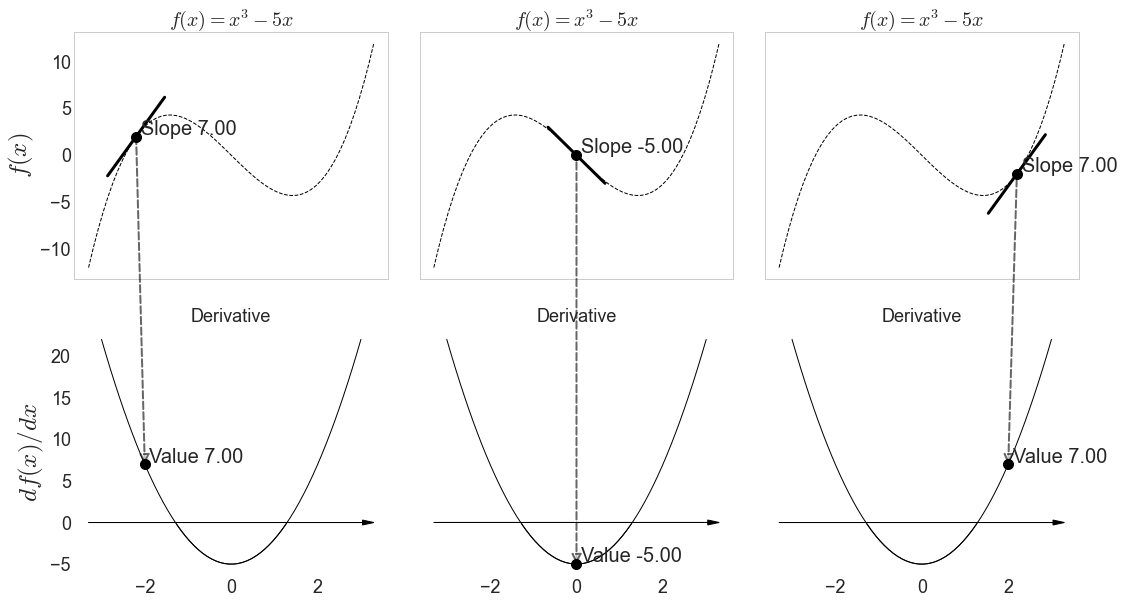

In [7]:
from matplotlib.patches import ConnectionPatch

fig, ax = plt.subplots(2, 3)
fig.set_size_inches((18,10))

def f(x) :
    return  x**3 - 5*x

def fdot(x):
    return 3*x**2 - 5

step = 60
x = np.linspace(-3, 3, step)

fdotx = fdot(x)
m_idx = np.where(fdotx<0)[0]
p_idx = np.where(fdotx>=0)[0]

#numerical deriv.
method = 'center'
eps = 0.01
itv=0.6
slope_points = (-2, 0, 2)

for i, j in enumerate((0, 1, 2)):
    ax[0,i].plot(x, f(x), '--', color='k', lw=1)
    ax[1,i].plot(x, fdotx,  color='k', lw=1)
    ax[1,i].plot(x[m_idx], fdotx[m_idx], color='k', lw=1)

    x0 = slope_points[j]
    diff = (f(x0+eps/2) - f(x0-eps/2))/eps

    # anti-derivative
    img1_cp    = ax[0,i].plot(x0, f(x0), 'o', markersize=10, color='k', zorder=3)
    img1_slope = ax[0,i].plot([x0-itv, x0+itv], [f(x0)-diff*itv, f(x0)+diff*itv], lw=3, color='k')
    img1_text  = ax[0,i].text(x0 + 0.1 ,f(x0)+0.2, r"Slope {:.2f}".format(diff), fontsize=20)
    ax[0,i].xaxis.set_tick_params(labelsize=18)
    ax[0,i].yaxis.set_tick_params(labelsize=18)
    ax[0,i].set_title(r"$f(x)=x^3 - 5x$", fontsize=20)
    ax[0,i].grid(False)
    if i == 0:
        ax[0,i].set_ylabel(r'$f(x)$', fontsize=25)

    # derivative
    img2_cp    = ax[1,i].plot(x0, fdot(x0), 'o', markersize=10, color='k', zorder=3)
    con = ConnectionPatch(xyA=(x0, fdot(x0)), xyB=(x0, f(x0)), ls='--', coordsA="data", coordsB="data",
                  axesA=ax[1,i], axesB=ax[0,i], color='k', lw=2, alpha=0.6,
                  arrowstyle="<|-", mutation_scale=20, fc="w", zorder=2)
    ax[1,i].add_artist(con)
    img2_deriv = ax[1,i].text(x0 + 0.1 ,fdot(x0)+0.2, "Value {:.2f}".format(fdot(x0)), fontsize=20)
    ax[1,i].xaxis.set_tick_params(labelsize=18)
    ax[1,i].yaxis.set_tick_params(labelsize=18)
    ax[1,i].set_title(r"Derivative", fontsize=18)
    ax[1,i].grid(False)
    arrowed_spines(fig, ax[1,i], axis='x')
    if i == 0:
        ax[1,i].set_ylabel(r'$df(x)/dx$', fontsize=25)
    
# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax_ in ax.flat:
    ax_.label_outer()
    
plt.subplots_adjust(hspace=0.2, wspace=0.1)

plt.show()